<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/Copy_of_2348545Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#loading the data
data=pd.read_csv('/content/insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder
for col in ['sex','smoker','region']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [ ]:
#defining the test variables
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [ ]:
#splitting the data in 4:1 ratio for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
#Building linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as mae
X_test_prediction = model.predict(X_test)
maerror=mae(Y_test, X_test_prediction)
maerror

4285.2194376337

In [ ]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error as mse
mserror=mse(Y_test,X_test_prediction)
mserror

38364832.19054552

In [ ]:
#calculating root mean squared error
import math
rmserror=np.sqrt(mserror)
rmserror

6193.935113523997

In [ ]:
#calculating R-squared score
from sklearn.metrics import r2_score as r2s
r2score=r2s(Y_test,X_test_prediction)
r2score

0.7445422986536503

In [ ]:
#calculating adjusted R-squared score
adj_R2 = 1- ((1-r2score) * (len(X_train)-1)/(len(X_train)-len(X.columns)-1))
adj_R2

0.7431003925312814

In [ ]:
#Calculating residual sum of squares
rss=np.sum(np.square(X_test_prediction-Y_test))
rss

10281775027.0662

In [ ]:
#calculating explained variance score
from sklearn.metrics import explained_variance_score as evs
evscore=evs(Y_test,X_test_prediction)
evscore

0.7445654634501958

In [ ]:
#Determining which features have the most significant impact on predicting
for col in range(0,6):
  print(X.columns[col]+":"+str(model.coef_[col]))

age:251.3668961303302
sex:-35.43381660090038
bmi:330.7613348473077
children:589.0586210065493
smoker:23905.965168476192
region:-323.6276027603943


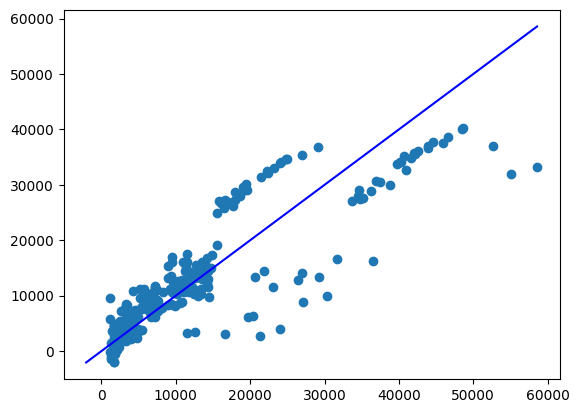

In [ ]:
#showing the actual insurance charges vs. predicted insurance charges
g=plt.scatter(Y_test,X_test_prediction)
p1 = max(max(X_test_prediction), max(Y_test))
p2 = min(min(X_test_prediction), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.show()